In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

## Loading the Dataset

In [11]:
df = pd.read_csv('hotels.csv')

In [12]:
df

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.75800,-73.985500,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.50720,-0.127600,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.85660,2.352200,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.68950,139.691700,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.27690,55.296200,9.3,9.5,9.6,8.9,9.4,8.5
5,6,Marina Bay Zenith,Singapore,Singapore,5,1.29027,103.851959,9.2,9.1,9.4,9.7,9.1,8.3
6,7,Sydney Harbour Grand,Sydney,Australia,5,-33.86510,151.209900,8.9,9.0,8.5,9.8,8.9,8.4
7,8,Copacabana Lux,Rio de Janeiro,Brazil,5,-22.90680,-43.172900,9.0,8.7,8.6,9.5,8.8,8.6
8,9,Berlin Mitte Elite,Berlin,Germany,5,52.52000,13.405000,9.3,9.2,9.0,9.1,9.1,8.7
9,10,The Maple Grove,Toronto,Canada,5,43.65320,-79.383200,9.4,9.3,9.2,8.8,9.2,8.8


In [13]:
df.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5


In [14]:
df.tail()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
20,21,The Bosphorus Inn,Istanbul,Turkey,5,41.0082,28.9784,9.1,9.0,8.8,9.3,8.9,8.5
21,22,Canal House Grand,Amsterdam,Netherlands,5,52.3676,4.9041,9.4,9.1,9.0,9.6,9.2,8.9
22,23,Tango Boutique,Buenos Aires,Argentina,5,-34.6037,-58.3816,8.9,8.8,8.7,9.0,8.8,8.7
23,24,The Savannah House,Lagos,Nigeria,5,6.5244,3.3792,8.7,8.6,8.5,8.9,8.6,8.4
24,25,The Kiwi Grand,Wellington,New Zealand,5,-41.2865,174.7762,9.3,9.2,9.1,9.0,9.1,8.8


## Understanding and preprocessing the Data

In [15]:
df.isnull()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

hotel_id                0
hotel_name              0
city                    0
country                 0
star_rating             0
lat                     0
lon                     0
cleanliness_base        0
comfort_base            0
facilities_base         0
location_base           0
staff_base              0
value_for_money_base    0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.describe()

,hotel_id,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
count,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.00000,25.00000,25.00000,25.000000
mean,13.000000,5.0,20.920591,33.897558,9.092000,9.064000,8.91600,9.27200,9.01600,8.512000
std,7.359801,0.0,31.175591,75.044300,0.230796,0.237837,0.29109,0.35534,0.24097,0.265079
min,1.000000,5.0,-41.286500,-99.133200,8.700000,8.600000,8.50000,8.50000,8.60000,7.900000
25%,7.000000,5.0,6.524400,2.173400,8.900000,8.900000,8.70000,9.00000,8.80000,8.400000
50%,13.000000,5.0,31.230400,18.424100,9.100000,9.100000,8.90000,9.30000,9.00000,8.500000
75%,19.000000,5.0,41.902800,100.501800,9.300000,9.200000,9.10000,9.60000,9.20000,8.700000
max,25.000000,5.0,55.755800,174.776200,9.600000,9.500000,9.60000,9.80000,9.50000,8.900000


## Ploting the graph

<Axes: >

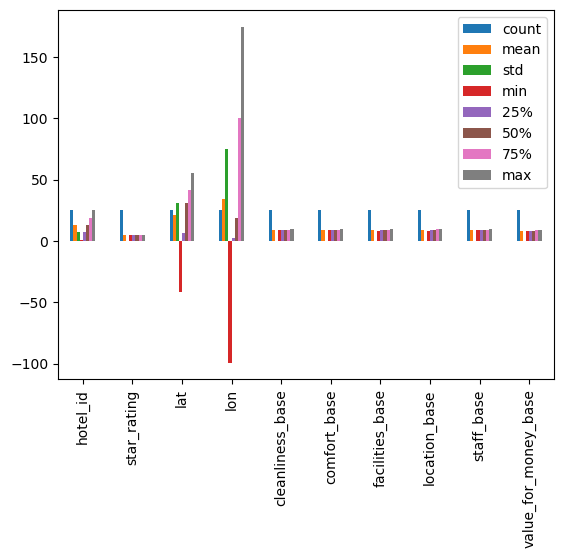

In [19]:
df.describe().T.plot(kind='bar')

In [20]:
df_nurr=pd.DataFrame(df)

In [21]:
df_nurr.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5


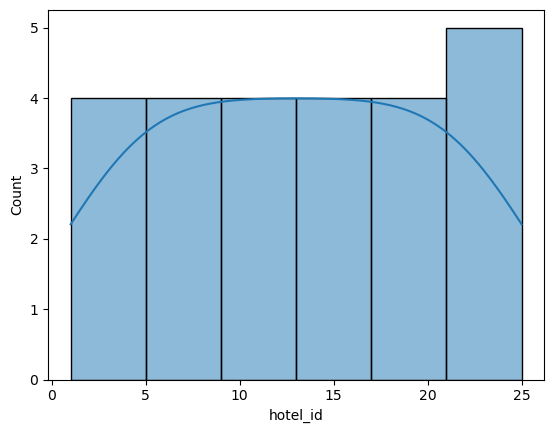

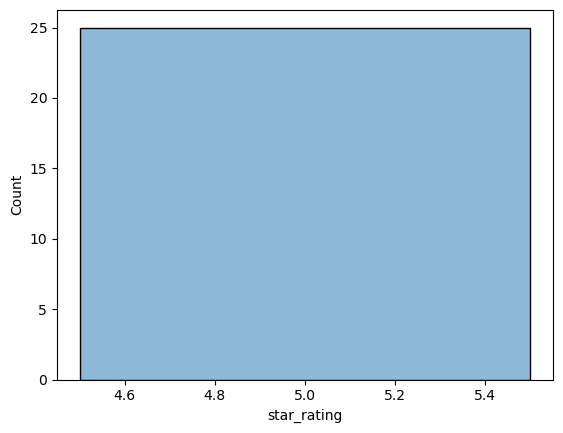

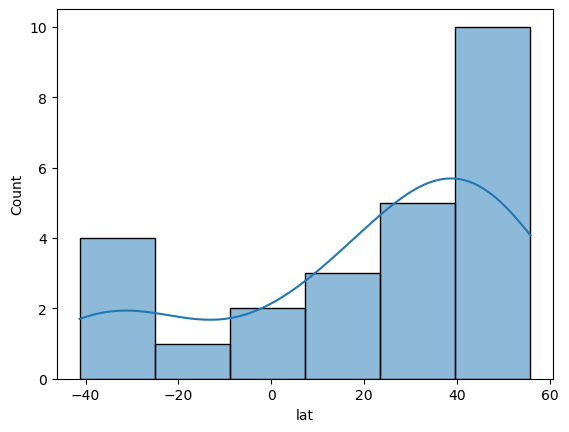

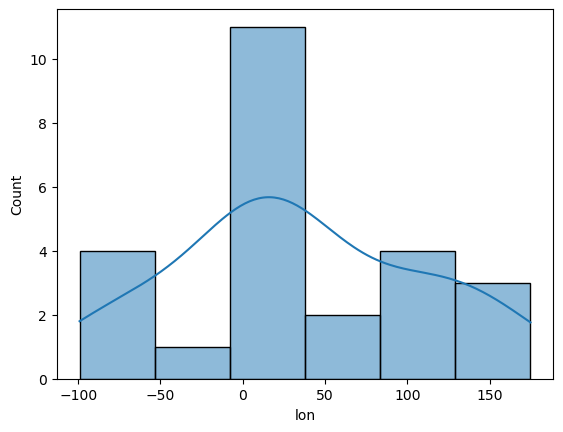

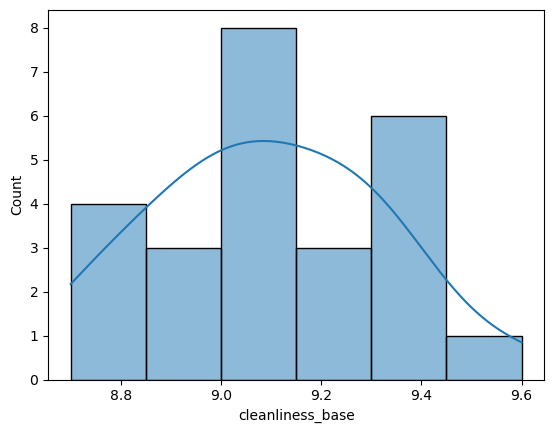

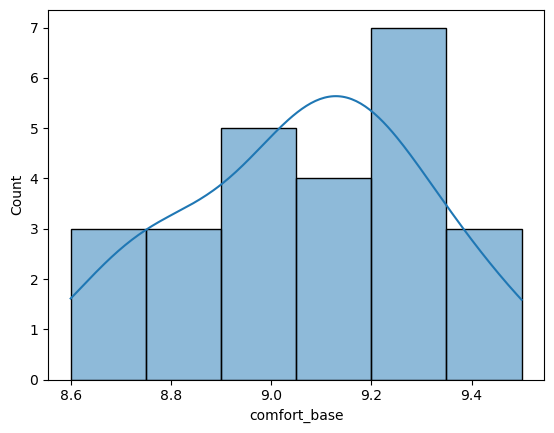

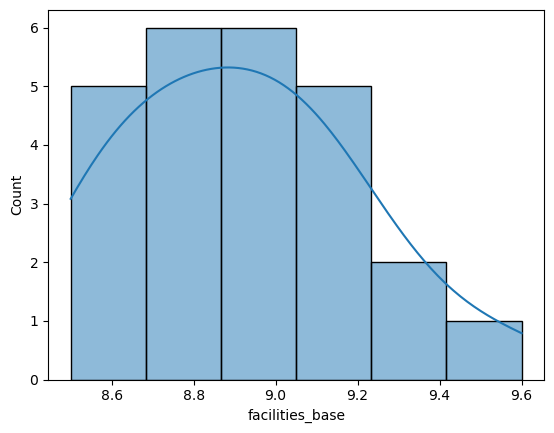

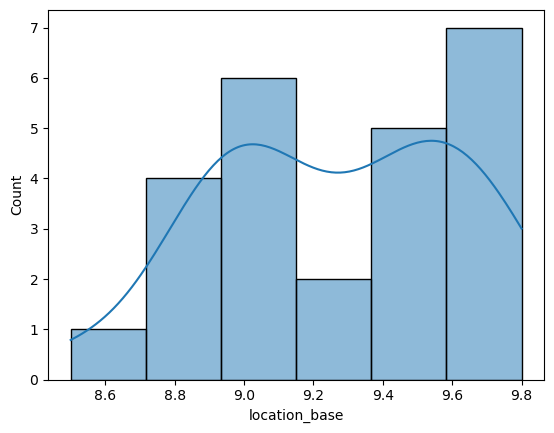

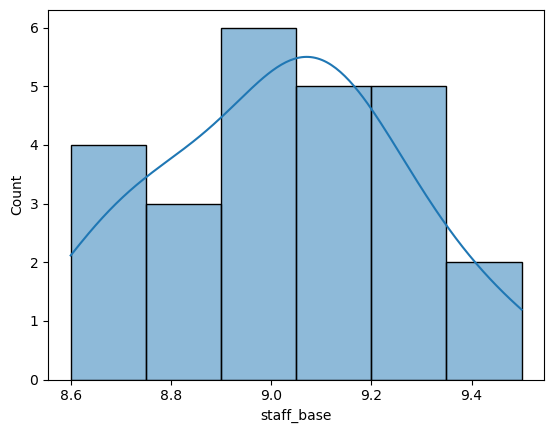

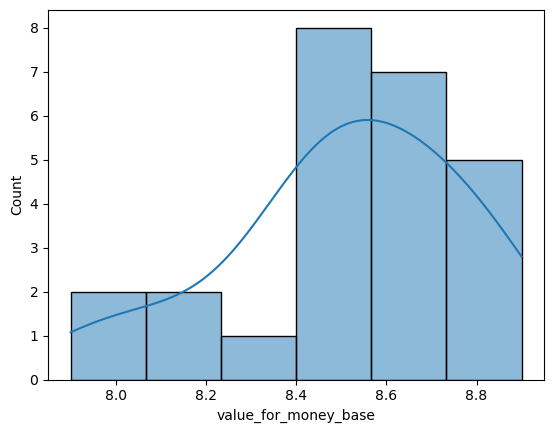

In [22]:
numeric_cols = df_nurr.select_dtypes(include=['number']).columns

for col in numeric_cols:
    sns.histplot(x=col, data=df_nurr, kde=True)
    plt.show()


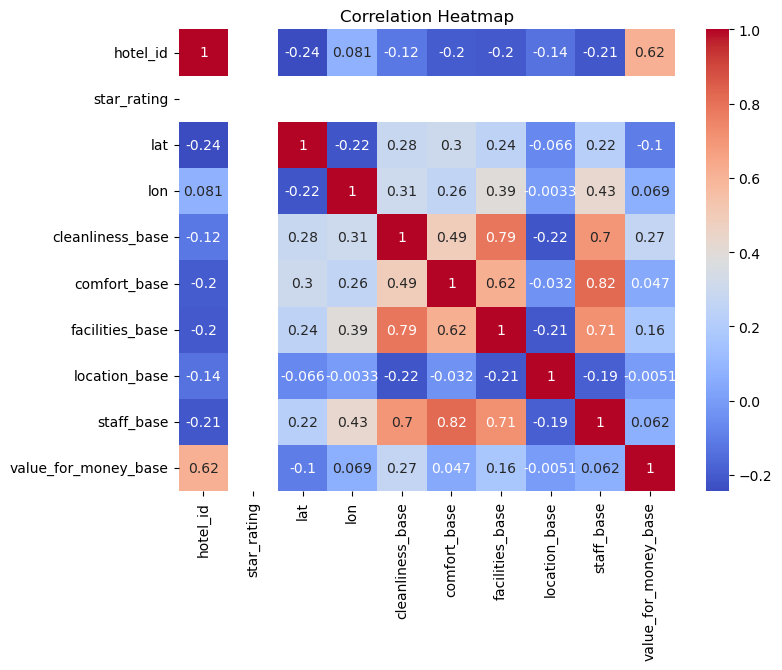

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


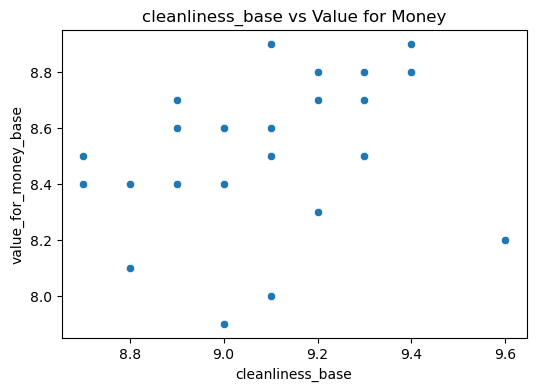

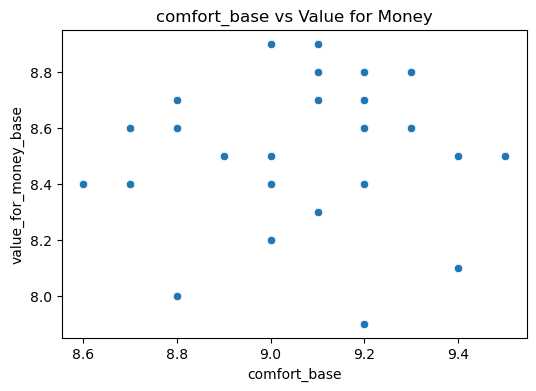

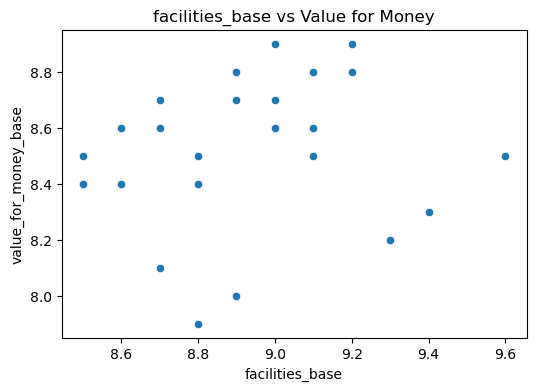

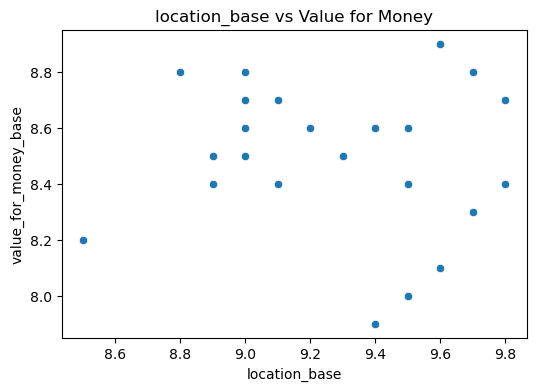

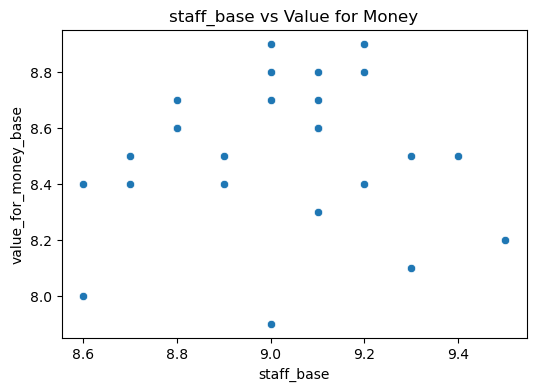

In [24]:
features = ["cleanliness_base","comfort_base","facilities_base","location_base","staff_base"]
for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["value_for_money_base"])
    plt.title(f"{col} vs Value for Money")
    plt.show()

## Predicting the regression

In [25]:
X = df[features]
y = df["value_for_money_base"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
coeff_df = pd.DataFrame(model.coef_, index=features, columns=["Coefficient"])
print(coeff_df)

Mean Squared Error: 0.19658914997047225
R2 Score: -2.3662525679875444
                  Coefficient
cleanliness_base     0.907766
comfort_base         0.255738
facilities_base      0.148498
location_base        0.091571
staff_base          -1.149935


## RandomForest Regression

Cross-validated R2 scores: [-4.46224057 -1.15210465 -0.51725676  0.13506818  0.19138953]
Average R2: -1.1610288514510647
value_for_money_base    1.000000
hotel_id                0.615093
cleanliness_base        0.267249
facilities_base         0.164805
lon                     0.069045
staff_base              0.062099
comfort_base            0.046792
location_base          -0.005131
lat                    -0.100074
star_rating                  NaN
Name: value_for_money_base, dtype: float64


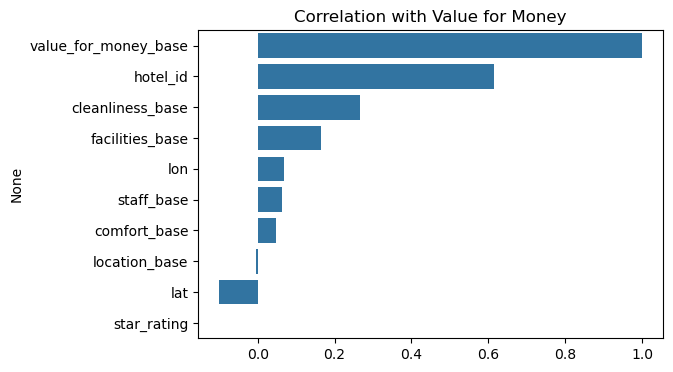

<Axes: ylabel='None'>

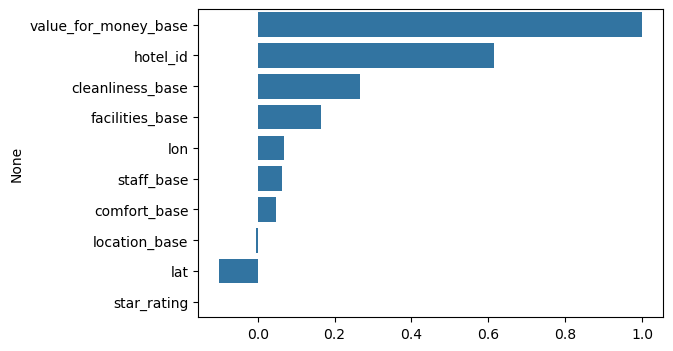

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(random_state=42)
scores=cross_val_score(rf, X, y, cv=5,scoring="r2")

print("Cross-validated R2 scores:", scores)
print("Average R2:", scores.mean())
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)["value_for_money_base"].sort_values(ascending=False)
print(corr)

plt.figure(figsize=(6,4))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation with Value for Money")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=corr.values, y=corr.index)